In [30]:
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
data = pd.read_csv('September_MTTR.csv')

In [32]:
data['MTTR']

0     8:23:53
1     4:58:19
2     3:22:56
3     3:11:30
4     3:09:10
       ...   
63    0:00:00
64    0:00:00
65    0:00:00
66    0:00:00
67    0:00:00
Name: MTTR, Length: 68, dtype: object

In [33]:
data_cleared = data[data['Number of stops'] > 2]
data_cleared = data_cleared[['Machine name','Number of stops','MTTR']]
data_cleared = data_cleared[data_cleared['MTTR'] != "0:00:00"]
data_cleared = data_cleared.head() # Return the top 5 values
data_cleared

,Machine name,Number of stops,MTTR
4,Placeholder 5,18.0,3:09:10
5,Placeholder 6,7.0,1:34:07
6,Placeholder 7,8.0,1:07:59
8,Placeholder 9,4.0,0:54:26
10,Placeholder 11,3.0,0:49:17


In [34]:
def to_sec():
    time = [string.split(':') for string in list((data_cleared['MTTR']))]
    second = []

    for i in range(len(time)):
        second.append(int(time[i][0]) * 3600 + int(time[i][1]) * 60 + int(time[i][2]))
    return second

print(to_sec())


[11350, 5647, 4079, 3266, 2957]


In [35]:
machines = list(data_cleared['Machine name'])
mttr = list(data_cleared['MTTR'])
values = to_sec()

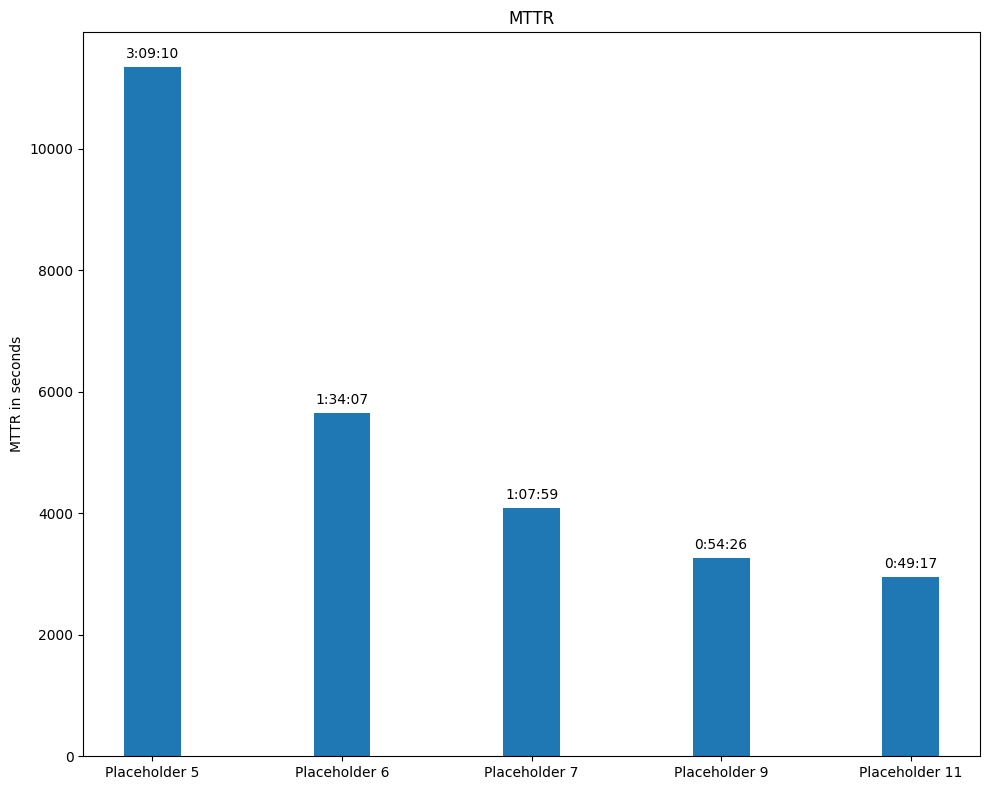

In [36]:
# Increase the figure size
plt.figure(figsize=(10, 8))

# Create the vertical bar plot
plt.bar(machines, values, width = 0.3)
#plt.xlabel('Machine name', fontweight = 'bold')
plt.ylabel('MTTR in seconds')
plt.title('MTTR')

# Rotate X-axis labels for readability
plt.xticks()

# Display the MTTR values on top of the bars
for i in range(len(values)):
    plt.text(i, values[i] + 100, mttr[i], ha='center', va='bottom')

plt.tight_layout()
plt.show()